## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x = np.linspace(0,20)
y = (-2*x)+1
print(x)
print(y)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.6734

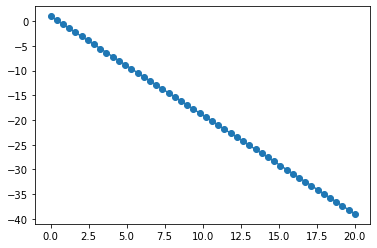

In [3]:
plt.plot(x,y)
plt.scatter(x,y)
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
learning_rate = 0.001
def GD_SVLR (x,y,alpha,itter):
    theta_0 = np.random.rand()
    theta_1 = np.random.rand()
    m=len(x)
    cf_list =[]
    theta_list_0 = []
    theta_list_1 = []
    hyp = []
    for j in range(itter):
        hep_list = []
        gradient_0 = 0
        gradient_1 = 0
        for i in range(m):
            hep = theta_0 + theta_1 * x[i]
            gradient_0 += (hep-y[i])
            cf = gradient_0**2
            gradient_1 += ((hep-y[i])*x[i])
            hep_list.append(hep)
            
        hyp.append(hep_list)
        theta_0 = theta_0 - alpha*(gradient_0/m)
        theta_1 = theta_1 - alpha*(gradient_1/m)
        theta_list_0.append(theta_0)
        theta_list_1.append(theta_1)
        cf_list.append(cf/(m*2))   
        #print(("itter={},Theata_0={},Theata_1={},Loss Fn = {},Hypothsis={}").format(j,theta_0,theta_1,cf[j],hyp[j]))
    return hyp , theta_list_0 , theta_list_1 , cf_list

#### Try your function with any input parameterss of your choice.

In [ ]:
hyp , theta_list_0 , theta_list_1 , cf_list = GD_SVLR (x,y,learning_rate,1000) 

#### Calculate r2 score

In [26]:
from sklearn import metrics
R2_score = metrics.r2_score(y_predict,y)
print(R2_score)


0.999439628686799


#### Plot loss vs. epochs

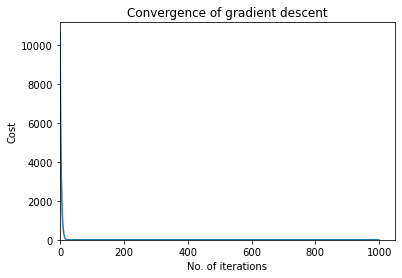

In [12]:
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cf_list)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

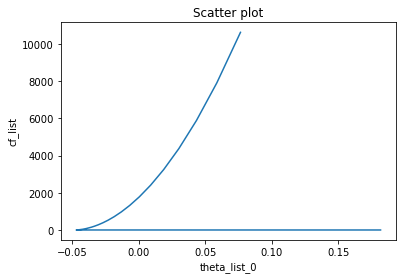

In [14]:
plt.plot(theta_list_0,cf_list)
plt.title('Scatter plot')
plt.xlabel('theta_list_0')
plt.ylabel('cf_list')
plt.show()

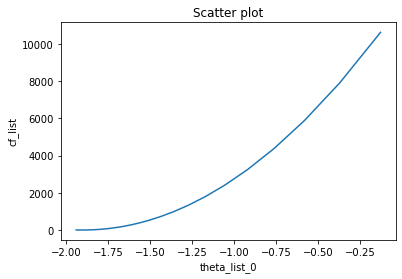

In [15]:
plt.plot(theta_list_1,cf_list)
plt.title('Scatter plot')
plt.xlabel('theta_list_0')
plt.ylabel('cf_list')
plt.show()

#### Plot all regression lines till converge

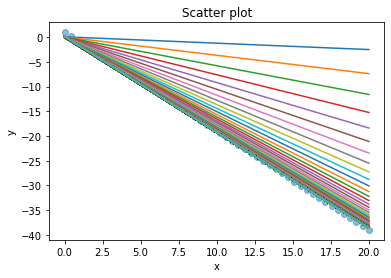

In [16]:
plt.scatter(x, y, alpha=0.5)
for i in range(1000):
    y_predict = theta_list_0[i] +(theta_list_1[i] * x)
    plt.plot(x,y_predict)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#### Plot the best regression line

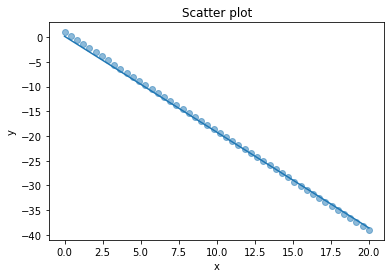

In [17]:
plt.scatter(x, y, alpha=0.5)
y_predict = theta_list_0[i] +(theta_list_1[i] * x)
plt.plot(x,y_predict)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [18]:
learning_rate = 0.001
def BGD_SVLR (x,y,alpha,itter,s):
    theta_0 = np.random.rand()
    theta_1 = np.random.rand()
    cf_list =[]
    theta_list_0 = []
    theta_list_1 = []
    m=int(len(x)/s)
    hyp = []
    for j in range(itter):
        z = 0
        while(z<len(x)):
            hep_list = []
            gradient_0 = 0
            gradient_1 = 0
            z += int(len(x)/s) # z += 10
            for i in range(z-m,z):
                hep = theta_0 + theta_1 * x[i]
                gradient_0 += (hep-y[i])
                cf = gradient_0**2
                gradient_1 += ((hep-y[i])*x[i])
                hep_list.append(hep) 
            hyp.append(hep_list)
            theta_0 = theta_0 - alpha*(gradient_0/m)
            theta_1 = theta_1 - alpha*(gradient_1/m)
            theta_list_0.append(theta_0)
            theta_list_1.append(theta_1)
            cf_list.append(cf/(m*2))
            #print(("itter={},Theata_0={},Theata_1={},Loss Fn = {},Hypothsis={}").format(j,theta_0,theta_1,cf[j],hyp[j]))
    return hyp , theta_list_0 , theta_list_1 , cf_list

In [19]:
hyp , theta_list_0 , theta_list_1 , cf_list = BGD_SVLR (x,y,learning_rate,1000,5) 

In [20]:
y_predict = theta_list_0[-1] +(theta_list_1[-1] * x)

In [21]:
from sklearn import metrics
R2_score = metrics.r2_score(y_predict,y)
print(R2_score)

0.999891940233177


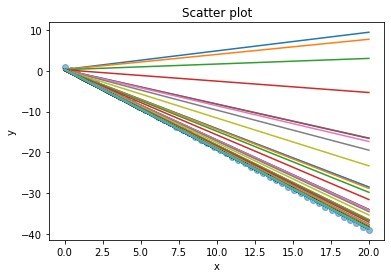

In [22]:
y_predict = theta_list_0[-1] +(theta_list_1[-1] * x)
plt.scatter(x, y, alpha=0.5)
for i in range(1000):
    y_predict = theta_list_0[i] +(theta_list_1[i] * x)
    plt.plot(x,y_predict)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [23]:
hyp , theta_list_0 , theta_list_1 , cf_list = BGD_SVLR (x,y,learning_rate,1000,50) 

In [24]:
from sklearn import metrics
R2_score = metrics.r2_score(y_predict,y)
print(R2_score)

0.9990909815772019


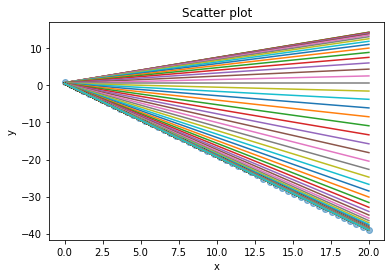

In [25]:
y_predict = theta_list_0[-1] +(theta_list_1[-1] * x)
plt.scatter(x, y, alpha=0.5)
for i in range(1000):
    y_predict = theta_list_0[i] +(theta_list_1[i] * x)
    plt.plot(x,y_predict)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [27]:
hyp , theta_list_0 , theta_list_1 , cf_list = BGD_SVLR (x,y,learning_rate,1000,50) 

In [28]:
from sklearn import metrics
R2_score = metrics.r2_score(y_predict,y)
print(R2_score)

0.999439628686799


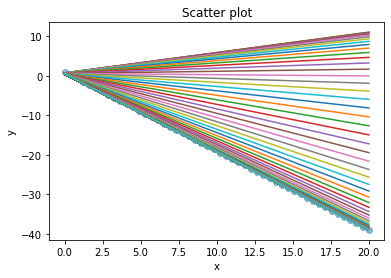

In [30]:
y_predict = theta_list_0[-1] +(theta_list_1[-1] * x)
plt.scatter(x, y, alpha=0.5)
for i in range(1000):
    y_predict = theta_list_0[i] +(theta_list_1[i] * x)
    plt.plot(x,y_predict)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
